In [616]:
#importerar några molduler som ska användas

import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns 

In [617]:
#Lada ner data från csv filen

df = pd.read_csv("ds_salaries.csv")

In [618]:
#Här inspekterar hur mycket rader och kolumner finns i databasen

print("Data shape:", df.shape)

Data shape: (3755, 11)


In [619]:
#Här får vi se kolumner namnt

print("Columns name: ", df.columns)

Columns name:  Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


In [620]:
#Häe kika vi data från första och sista 5 rader

df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [621]:
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


In [622]:
#Här får vi ser olika targets

df.value_counts("job_title")

job_title
Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
                             ... 
Compliance Data Analyst         1
Cloud Data Architect            1
BI Data Engineer                1
Azure Data Engineer             1
Staff Data Scientist            1
Length: 93, dtype: int64

In [623]:
#Här inspekterar vilka typer av data finns i databasen

df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [624]:
#Här dropar vi några löner kolumner för att ha bara en lön kolumn(salary_in_usd)

df.drop(["salary", "salary_currency"], axis=1, inplace=True)

In [625]:
#Vi dropar också remote_ratio kolumnen eftersom det verkar inte att dessa data spelar någon roll om lönen.

df.drop(["remote_ratio"], axis=1, inplace=True)

In [626]:
#Här får vi se numeric data

df.describe()

,work_year,salary_in_usd
count,3755.000000,3755.000000
mean,2022.373635,137570.389880
std,0.691448,63055.625278
min,2020.000000,5132.000000
25%,2022.000000,95000.000000
50%,2022.000000,135000.000000
75%,2023.000000,175000.000000
max,2023.000000,450000.000000


In [627]:
#Här söker vi till nulla värde

df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
company_location      0
company_size          0
dtype: int64

In [628]:
#Här ändrar vi categori variabler till numerical värde som jag tänker spelar någom roll

df = pd.get_dummies(df,columns=["experience_level", "company_size"])

In [629]:
df

,work_year,employment_type,job_title,salary_in_usd,employee_residence,company_location,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,company_size_L,company_size_M,company_size_S
0,2023,FT,Principal Data Scientist,85847,ES,ES,0,0,0,1,1,0,0
1,2023,CT,ML Engineer,30000,US,US,0,0,1,0,0,0,1
2,2023,CT,ML Engineer,25500,US,US,0,0,1,0,0,0,1
3,2023,FT,Data Scientist,175000,CA,CA,0,0,0,1,0,1,0
4,2023,FT,Data Scientist,120000,CA,CA,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,FT,Data Scientist,412000,US,US,0,0,0,1,1,0,0
3751,2021,FT,Principal Data Scientist,151000,US,US,0,0,1,0,1,0,0
3752,2020,FT,Data Scientist,105000,US,US,1,0,0,0,0,0,1
3753,2020,CT,Business Data Analyst,100000,US,US,1,0,0,0,1,0,0


In [630]:
#Här gör numerical columner till skala med StandardScaler för att hjälpa mäskinen att tolka

#numerical_kolumner = ['salary_in_usd', 'company_size_L', 'company_size_M', 'company_size_S', 'work_year']
#skala = StandardScaler()
#df[numerical_kolumner] = skala.fit_transform(df[numerical_kolumner])

#Resultat blev lite konstig så jag valt att inte använda scaler

In [631]:
#df

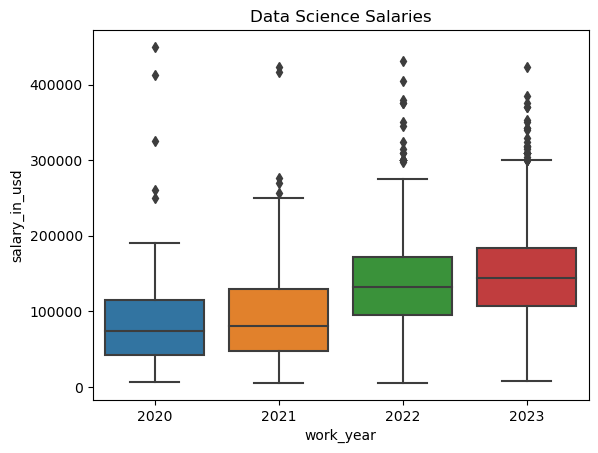

In [632]:
#Här börjar visualization, var work_year är input och salary_in_usd output

sns.boxplot(x="work_year", y="salary_in_usd", data=df)
plt.title("Data Science Salaries")
plt.show()

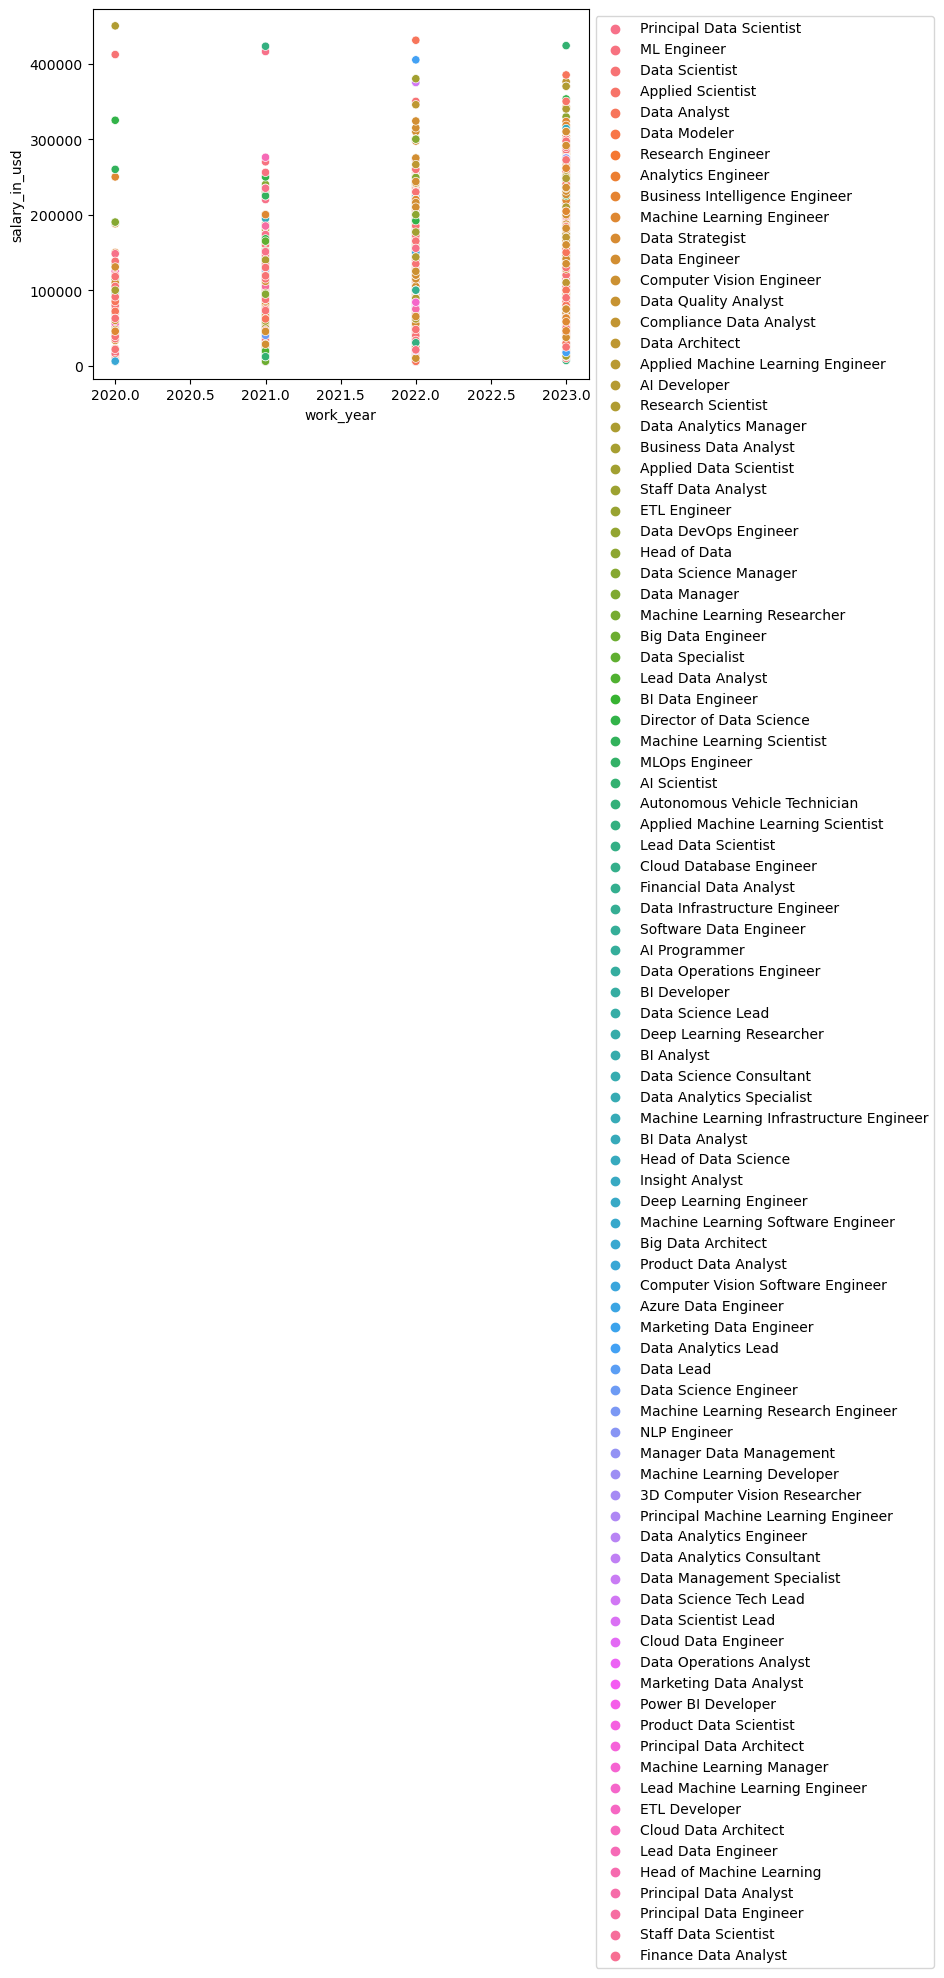

In [633]:
#Här data visualizationen med scatterplot ser stökig ut pga massa jobb titel

sns.scatterplot(x="work_year", y="salary_in_usd", hue="job_title", data=df)
plt.legend(bbox_to_anchor=(1,1), loc = 2)
plt.show()

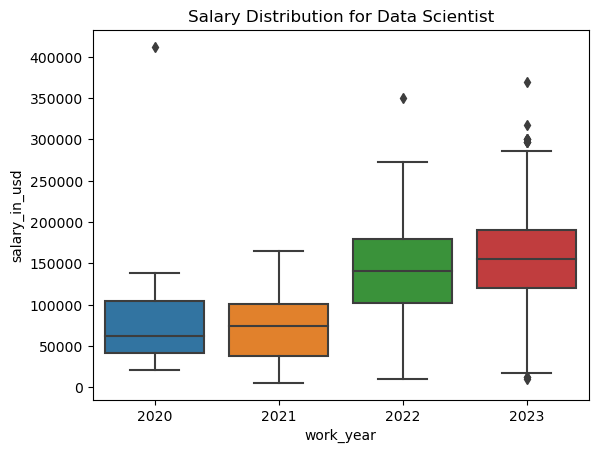

In [634]:
#För att inte bli stökig vi får plocka upp specifik data, som t.ex, bara ett jobb titel

#Hämtar en specifik jobb från job_title kolumnen
job = df[df["job_title"] == "Data Scientist"]

#Skapar en boxplot visualization från job
sns.boxplot(x="work_year", y="salary_in_usd", data=job)
plt.title("Salary Distribution for Data Scientist")
plt.show()


In [635]:
#Här gör vi korrelationen

df.corr(method="pearson")

#Jag kunde har använt "kendall" som gav ett olika resultat, men jag har inte riktigt förståt vad var detta för skillnad

,work_year,salary_in_usd,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,company_size_L,company_size_M,company_size_S
work_year,1.000000,0.228290,-0.141498,0.003156,-0.128381,0.194923,-0.320941,0.421975,-0.257948
salary_in_usd,0.228290,1.000000,-0.285743,0.160986,-0.273791,0.349900,-0.113346,0.201830,-0.190663
experience_level_EN,-0.141498,-0.285743,1.000000,-0.054007,-0.159440,-0.434942,0.179372,-0.253978,0.178369
experience_level_EX,0.003156,0.160986,-0.054007,1.000000,-0.092433,-0.252152,-0.003729,-0.003061,0.012020
experience_level_MI,-0.128381,-0.273791,-0.159440,-0.092433,1.000000,-0.744400,0.072992,-0.097174,0.060936
experience_level_SE,0.194923,0.349900,-0.434942,-0.252152,-0.744400,1.000000,-0.168860,0.236746,-0.163489
company_size_L,-0.320941,-0.113346,0.179372,-0.003729,0.072992,-0.168860,1.000000,-0.848729,-0.075121
company_size_M,0.421975,0.201830,-0.253978,-0.003061,-0.097174,0.236746,-0.848729,1.000000,-0.463577
company_size_S,-0.257948,-0.190663,0.178369,0.012020,0.060936,-0.163489,-0.075121,-0.463577,1.000000


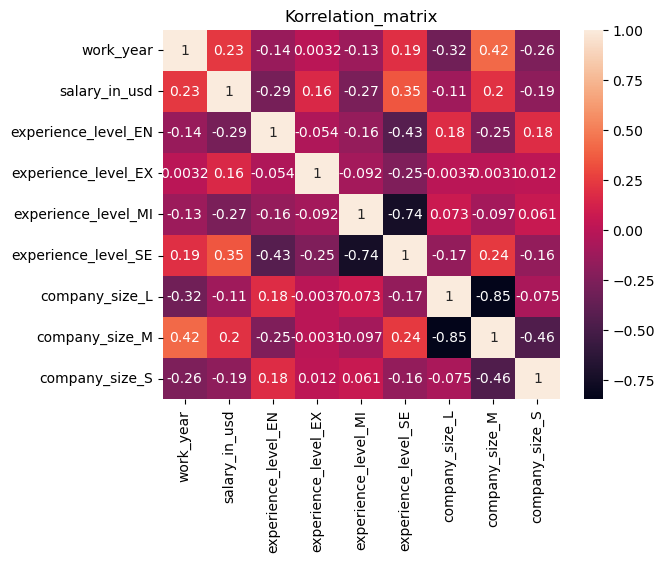

In [636]:
#Här visar korrelationen på en heatmap

korrelation_matrix = df.corr()
sns.heatmap(korrelation_matrix, annot=True)
plt.title("Korrelation_matrix")
plt.show()